### T-test
T-test는 t분포를 활용한 검정 방식이다. 흔히, "광고를 본 그룹과 보지 않은 그룹 사이의 커피 맛 만족도는 다를 것이다." 같이 서로 다른(독립인) 두 그룹의 차이를 볼 때 사용하지만(Independent t-test : 독립표본 t검정), 그 외로 

"커피에 대한 만족도 평균이 ~과 같은가?" (one-sample t-test : 단일표본 t검정)<br>
"커피를 마시기 전과 후에 업무수행 능력 차이가 보이는가?" (Paired t-test, 대응 표본 t 검정)

과 같이 t-분포에 기반한 여러 검증이 가능하다.

### Load Dataset, Technical Analysis
통계 분석 전에는 항상 데이터에 대한 기술적 분석을 해야 한다. 데이터의 특징을 파악하는 것에서 부터 이상치나 결측치에 대한 대처도 해야하기 때문이다.

지금부터 사용할 데이터는 "학습 방법(A그룹, B그룹)에 따른 시험 성적의 차이가 유의한가?"를 분석한 결과이다. (대응표본 t검정)

In [2]:
import pandas as pd

df = pd.read_csv("./Data/test.csv")
df.head()

,Student_ID,Class,Score
0,ID_1,A,79
1,ID_2,A,85
2,ID_3,A,77
3,ID_4,A,83
4,ID_5,A,70


그룹을 분할해서 데이터를 확인한다.

In [4]:
class_a = df.loc[df['Class']=="A"].reset_index(drop=True)
class_b = df.loc[df['Class']=="B"].reset_index(drop=True)

# 각 데이터셋의 요약통계량 확인
print(f"A그룹의 요약 통계량 : \n {class_a.describe()}\n" )
print(f"B그룹의 요약 통계량 : \n {class_b.describe()}" )

A그룹의 요약 통계량 : 
            Score
count  25.000000
mean   75.560000
std     6.988562
min    66.000000
25%    70.000000
50%    76.000000
75%    79.000000
max    88.000000

B그룹의 요약 통계량 : 
            Score
count  25.000000
mean   81.360000
std     7.393015
min    70.000000
25%    74.000000
50%    83.000000
75%    85.000000
max    94.000000


B그룹의 성적이 더 높은것으로 확인된다. 박스플롯을 그려 모르는 문제가 있는지 확인한다.

<Axes: xlabel='Class', ylabel='Score'>

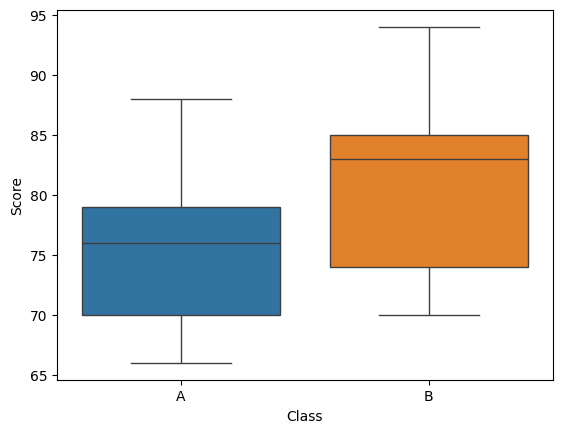

In [7]:
import seaborn as sns

sns.boxplot(x="Class", y="Score", data=df, hue="Class")

이러한 차이가 **유의미한** 통계적 차이일지 확인한다

### T-Test 수행
각 그룹의 성적과, 보정 여부를 설정한 후 t-test를 수행한다.

In [8]:
import pingouin as pg

pg.ttest(class_a["Score"], class_b['Score'], correction='auto')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.85059,48,two-sided,0.006414,"[-9.89, -1.71]",0.806269,6.862,0.797627


|컬럼명|설명|
|---|---|
|T|T값|
|dof|자유도|
|alternative|통계 분석 방법|
|p-val|p값(0.05보다 작을 경우 일반적으로, 통계적으로 유의하다고 본다.)|
|CI|신뢰구간 (p값을 보완하는 통계값, 보고서에 따라 같이 제공할 필요 있음)|

p-value가 0.05보다 훨씬 작기 때문에 두 그룹 사이의 점수 차이가 유의미하다고 볼 수 있다.

### t-test지만, 조건이 다른 두 검정(단일표본) 방식
단일표본 t검정은 t분포를 쓴다는 점에서 다른 t검정과 같이 묶이지만 다른 접근 방식을 갖고 있다. 이름에서 확인되듯(단일표본, 1-sample) *"두 집단 대신 하나의 집단을 분석할 때"* 사용되기 때문이다.

단일표본 검정은 하나의 집단(데이터)에서 특정값이 갖는 위치를 확인하는 데 사용한다.

> ex. 전 국민을 대상으로 스트레스 지수를 측정했을 때, 스트레스 지수의 평균값이 50<> 이라고 보도되었다. 학생 1000명을 대상으로 스트레스 측정을 진행했을 때, 학생들이 평균보다 더 높더나 낮은 스트레스를 받는지 알 수 있을까?

이와 같은 문제가 주어지면 연구원들은

> 학생들의 스트레스 평균이 50과 통계적으로 차이가 없다는 생각을 귀무가설 <br> 학생들의 스트레스 평균이 50과 통계적으로 차이가 있다는 생각을 대립가설

로 설정하여, t분포를 통해 검정하는 방법을 취한다.

In [9]:
survey = pd.read_csv("./Data/stress.csv")
survey.head()

,Student_ID,Stress
0,ID_1,61
1,ID_2,63
2,ID_3,77
3,ID_4,76
4,ID_5,72


결측치, 이상치 확인을 위한 기술 분석

In [11]:
survey.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
Stress,1000.000000,65.054000,10.299085,33.000000,58.000000,65.000000,71.000000,95.000000


최대값과 최소값도 지정한 범위 내로 들어와있고, count도 1000개로 조사한 인원 수와 동일하다.

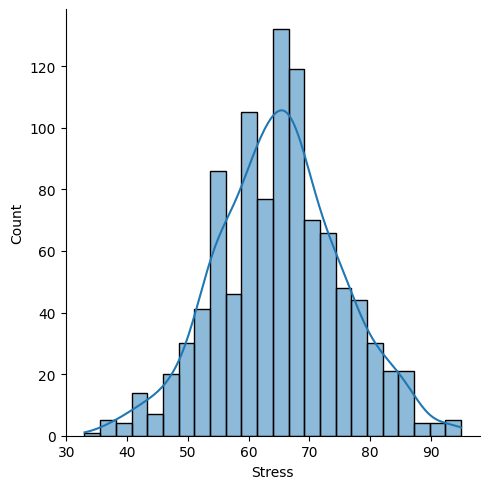

In [12]:
sns.displot(survey, x='Stress', kde=True)

데이터의 평균이 50 이상이고, 높은 스트레스 수치가 많이 관측된다. 기술적 분석 결과, 학생 집단은 스트레스 지수가 높은 편에 속하는 것 같습니다. 하지만 "그럴것 같다"와 "통계적으로 유의하다"는 다르다.

### 단일 표본 t-test를 위한 단계
t-test를 수행하기 전 우리는 **데이터가 통계 기법을 사용하기 적합한 조건인지**를 확인해야한다. 위에서는 자동 보정 기능을 사용했지만, 이번에는 직접 조건을 확인한다.

### 샤피로-윌크 검정(Shapiro-Wilk)
샤피로-윌크 검정은 데이터의 정규성을 검정하는데 사용한다. 이는 데이터가 통계적 기법을 사용하기 적당한 분포를 가지고 있는지 확인하는 과정이다. 

데이터가 적합한 분포를 가질 경우 "정규 분포를 따른다"고 하며, 이는 많은 통계 기법의 전제 조건이 된다.

In [13]:
pg.normality(survey['Stress'])

,W,pval,normal
Stress,0.996979,0.055226,True


일반적으로 p-value가 0.05보다 낮은 경우 "정규성이 위배" 되고 그 외의 경우 "정규성이 만족"된다고 본다.

### 단일표본 t검정
지금 이 문제에서는 학생들의 스트레스 지수 평균이 전체 인구 평균과 유의미한 차이가 있는지 확인하려 한다.

이를 위해 설문의 스트레스 변수값을 단일표본 t검정 함수에 전체 인구 평균과 같이 넣어준다.

In [17]:
avg_stress = 50

results = pg.ttest(survey['Stress'], avg_stress)
round(results, 3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,46.222,999,two-sided,0.0,"[64.41, 65.69]",1.462,1.595e+246,1.0


p-value를 기준으로, 귀무가설이 기각된다 (p < 0.001)

즉, 학생들의 스트레스 지수 평균은 50과 통계적으로 같지 않다.

검정 결과 t(999) = 46.222, p < 0.001, 신뢰구간 95%애서 [64.41, 65.69]로 대립가설을 채택한다.